# Task 2: The Sparks Foundation (Predicition Using Unsupervised ML)

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn import datasets

# Load the dataset

In [2]:
iris = datasets.load_iris()
n = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.DataFrame(iris.target, columns=['Species'])
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


In [3]:
y.replace({0: 'iris-setosa', 1: 'iris-versicolor',2:'iris-virginica'},inplace=True)

In [4]:
final_iris = pd.concat([n,y], axis=1)
final_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa


# Data Exploration

In [5]:
final_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [6]:
final_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
final_iris["Species"].value_counts()

iris-versicolor    50
iris-setosa        50
iris-virginica     50
Name: Species, dtype: int64

In [8]:
final_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
final_iris.groupby("Species").mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Species,,,,
iris-setosa,5.006,3.428,1.462,0.246
iris-versicolor,5.936,2.770,4.260,1.326
iris-virginica,6.588,2.974,5.552,2.026


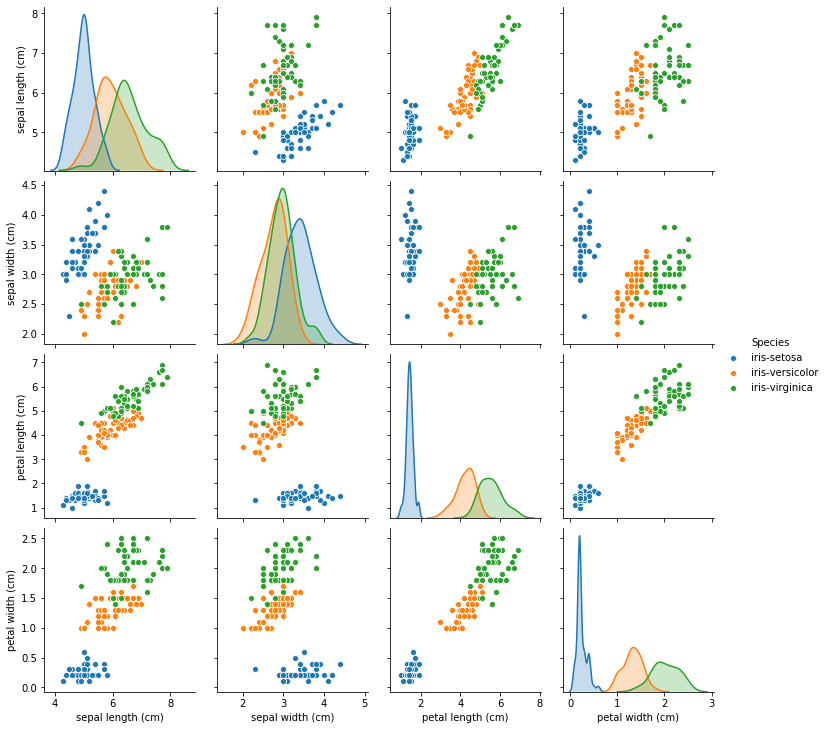

In [10]:
sns.pairplot(final_iris, hue="Species")

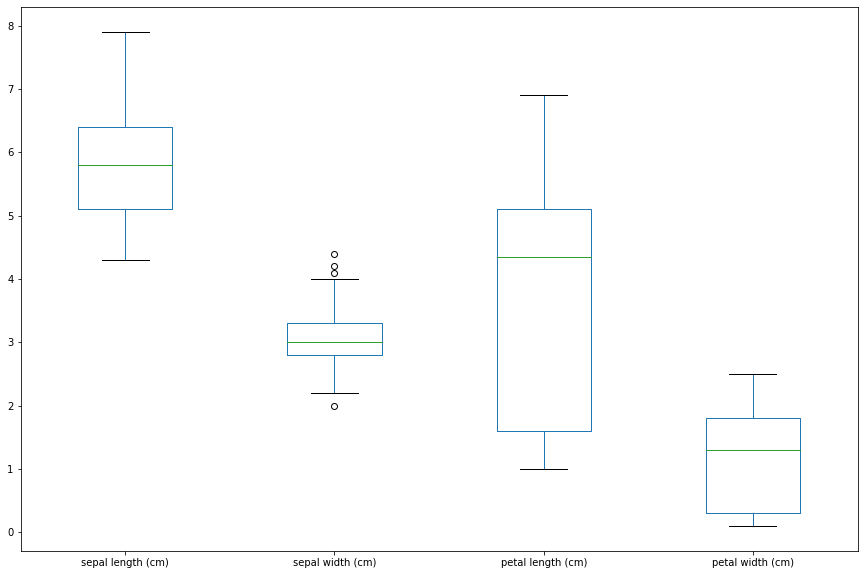

In [11]:
final_iris.plot(kind='box' , sharex = False , sharey = False, figsize=(15,10))

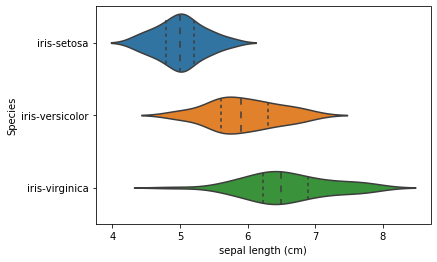

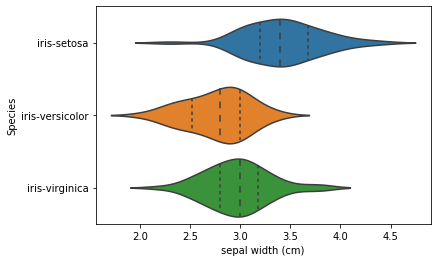

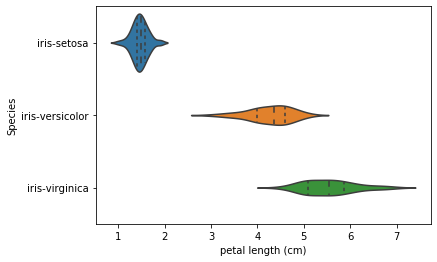

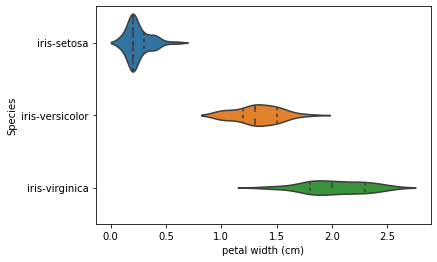

In [12]:
g = sns.violinplot(y='Species', x='sepal length (cm)', data=final_iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='sepal width (cm)', data=final_iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='petal length (cm)', data=final_iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='petal width (cm)', data=final_iris, inner='quartile')
plt.show()

# Finding Optimum Number of Cluster

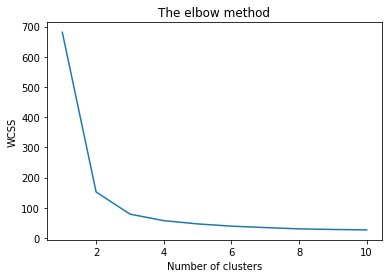

In [13]:
x = iris.data
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# K-mean Clustering  

In [14]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualize the Clustering result

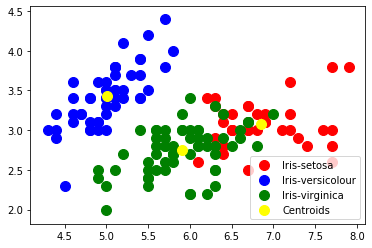

In [15]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Web App to Predict iris Flower

In [16]:
import streamlit as st
from sklearn.ensemble import RandomForestClassifier

In [17]:
st.write("Iris Flower Predition app: This app predit the iris flower type")
st.sidebar.header("User Input Parameters")

In [18]:
def user_input_features():
    sepal_lenght=st.sidebar.slider("sepal length",4.3,7.9,5.4)
    sepal_width=st.sidebar.slider("sepal_width",2.0,4.4,3.4)
    petal_lenght=st.sidebar.slider("petal lenght",1.0,6.9,1.3)
    petal_width=st.sidebar.slider("petal_width",0.1,2.5,0.2)
    data={"sepal_lenght":sepal_lenght,"sepal_width":sepal_width,"petal_lenght":petal_lenght,"petal_width":petal_width}
    features=pd.DataFrame(data,index=[0])
    return features

In [19]:
df=user_input_features()
st.subheader("User Input Parameters")
st.write(df)

In [20]:
iris = datasets.load_iris()
X=iris.data
Y=iris.target
clf=RandomForestClassifier()
clf.fit(X,Y)
prediction = clf.predict(df)
prediction_proba = clf.predict_proba(df)

In [21]:
st.subheader('Class labels and their corresponding index number')
st.write(iris.target_names)

st.subheader('Prediction')
st.write(iris.target_names[prediction])
st.write(prediction)

st.subheader('Prediction Probability')
st.write(prediction_proba)

# Task 3: The Sparks Foundation (Predicition Using Decision Tree Algorithm)

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

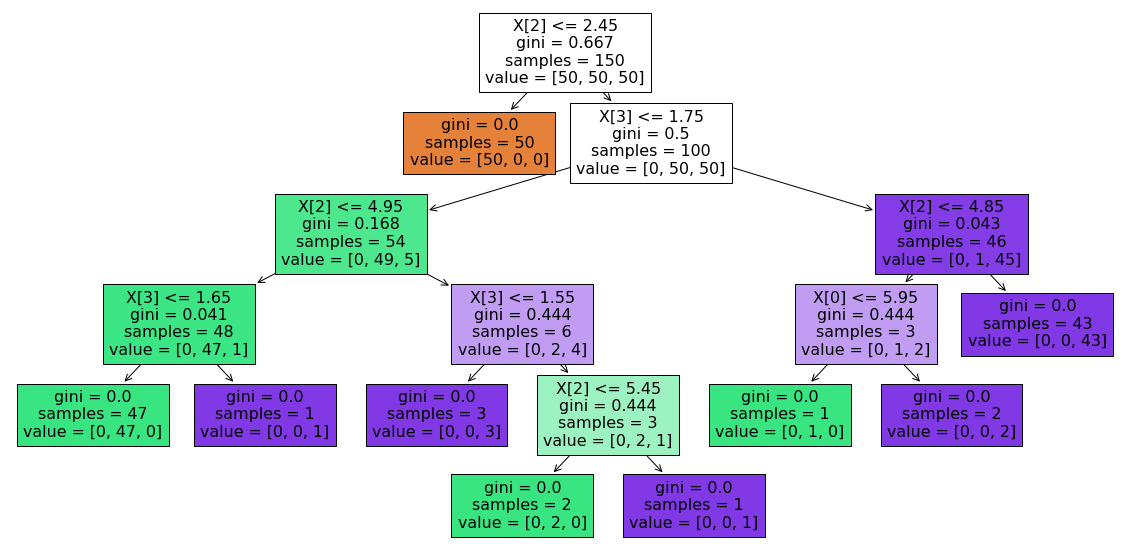

In [23]:
# Apply the decision tree classifier model to the data using all four parameters at once.
model_all_params = DecisionTreeClassifier().fit(iris.data, iris.target)
# Prepare a plot figure with set size.
plt.figure(figsize = (20,10))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(model_all_params, 
          filled=True      )
# Display the tree plot figure.
plt.show()